In [4]:
from __future__ import print_function


In [5]:
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [41]:
#audio_path = librosa.util.example_audio_file()

# or uncomment the line below and point it at your favorite song:

audio_path = './../Music/AutumnLeaves.mp3'
y, sr = librosa.load(audio_path)

/Users/ryanwang/opt/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [42]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

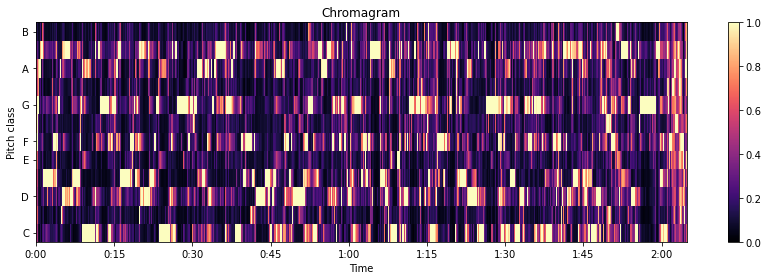

In [43]:
# We'll use a CQT-based chromagram with 36 bins-per-octave in the CQT analysis.  An STFT-based implementation also exists in chroma_stft()
# We'll use the harmonic component to avoid pollution from transients
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr, bins_per_octave=36)

#C is a numpy array that has rows as each sample time and columns as the probability of being in that note

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()

In [44]:
type(C)
C.shape

(12, 5376)

In [48]:
class MusicNote(object):
    
    def __init__(self, pitch):

        self.pitch = pitch
        self.duration = 1
    def getPitch(self):
        return self.pitch
    def getDuration(self):
        return self.duration
    def addDuration(self):
        self.duration += 1
    def __repr__(self):
        return (repr(self.pitch) + " note | " + repr(self.duration) + " long")
    
    
class MusicInstant(object):
    # pitchValues is a numpy array thats 12 elements long, each element represents the probability of a note
    def __init__(self, pitchValues):
        #noteObjArr holds an array of 1 and 0, each element corresponding to a particular music
        self.noteObjArr = pitchValues


        
    def getNoteObjArr(self):
        return self.noteObjArr

    def __repr__(self):
        return repr(self.noteObjArr)
    
    

In [50]:
#Swaps the rows and columns
musicArr = C.transpose()

totalArr = []

#print(len(C))
print(musicArr[:5])

for instant in musicArr:
#    print(len(instant))
    totalArr += [MusicInstant(instant)]
#    print(totalArr[0])
    
    

print(totalArr)


[[0.29978168 0.31207955 0.5069055  0.4751799  1.         0.94655997
  0.6880736  0.24587756 0.29376638 0.4169049  0.16825414 0.09632606]
 [0.30352512 0.3199365  0.50788707 0.47798106 1.         0.9490236
  0.6876477  0.24928914 0.29501542 0.421449   0.17141825 0.10023401]
 [0.3137952  0.34055987 0.5106479  0.48170966 1.         0.95655286
  0.6932913  0.2621825  0.30082694 0.43376714 0.1783889  0.0994387 ]
 [0.3260975  0.36232564 0.51271975 0.48417252 1.         0.96517104
  0.69692254 0.27517945 0.29969    0.45182124 0.18844728 0.09871104]
 [0.3458256  0.38954973 0.5168987  0.49172354 1.         0.98094505
  0.70838195 0.29233322 0.30597052 0.47891864 0.20379303 0.09653796]]
[array([0.29978168, 0.31207955, 0.5069055 , 0.4751799 , 1.        ,
       0.94655997, 0.6880736 , 0.24587756, 0.29376638, 0.4169049 ,
       0.16825414, 0.09632606], dtype=float32), array([0.30352512, 0.3199365 , 0.50788707, 0.47798106, 1.        ,
       0.9490236 , 0.6876477 , 0.24928914, 0.29501542, 0.421449  